# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [2]:
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url, header=None, names=column_names)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


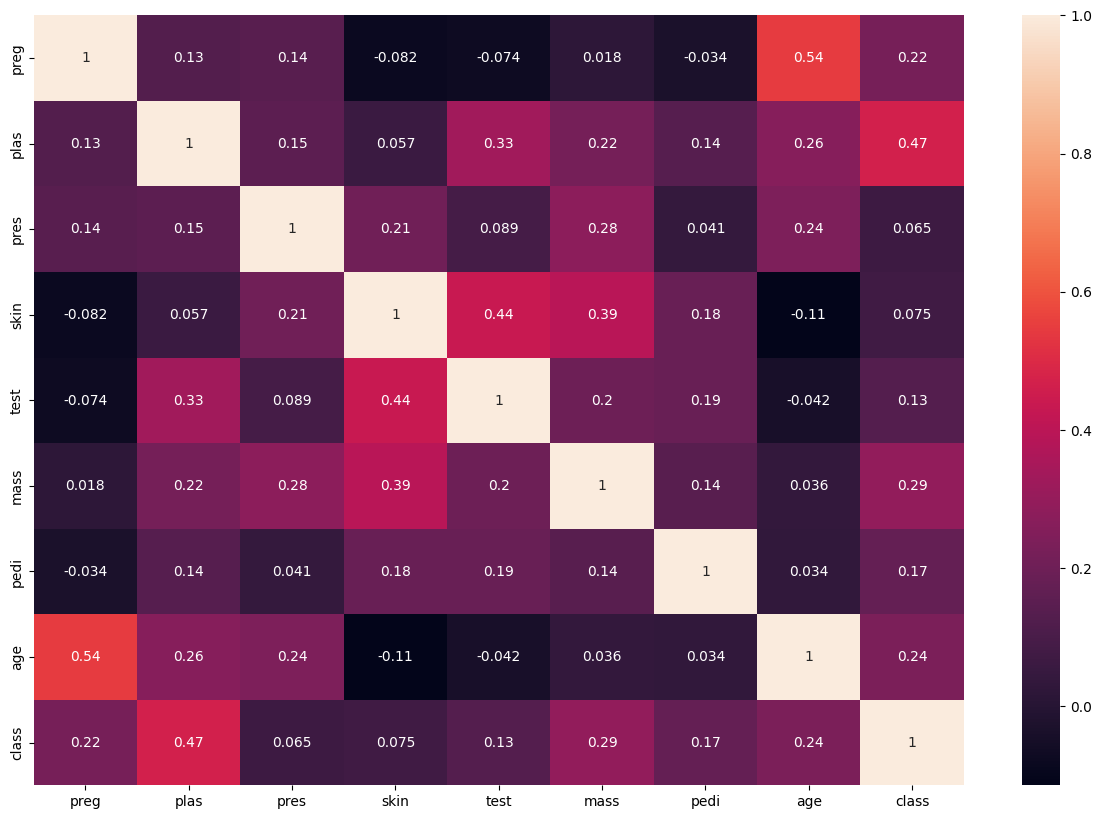

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True);

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [ ]:
# Separa los datos en features (X) y target (y)
# Nuestro target es df["class"]
# Muestra el shape de ambos conjuntos

In [13]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [19]:
X = df.loc[:, ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]
y = df["class"]

In [20]:
print("X_train", X.shape)
print("X_train", y.shape)

X_train (768, 8)
X_train (768,)


In [21]:
# Vamos a grabar la semilla 7 para todos los modelos en la variable seed

In [22]:
seed = 7

In [24]:
# Instancia un Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)

# Instancia un Bagging Classifier cuyo base estimator sea el DecisionTreeClassifier() , el número de estimadores sea 100 y el random state sea la semilla seed que hemos creado
from sklearn.ensemble import BaggingClassifier
estimator = dt

bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=1000, 
    max_samples=100, 
    bootstrap=True,
    random_state=seed)

# Instancia 10 KFolds en la variable kfold
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# Cálcula el cross validation score del Bagging Classifier con X e y, el cv sea igual a kfold y el scoring sea 'accuracy'
cv_results = cross_val_score(
    bag_clf, 
    X, 
    y, 
    cv=kfold, 
    scoring="accuracy"
)
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [25]:
cv_results

array([0.81818182, 0.76623377, 0.68831169, 0.77922078, 0.84415584,
       0.79220779, 0.67532468, 0.76623377, 0.78947368, 0.72368421])

In [ ]:
# Obtén la media del cross validation score para el Bagging Classifier
# Simplemente en la variable en la que guardaste el CV usa el método < .mean() >

In [26]:
cv_results.mean()

np.float64(0.7643028024606973)

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Instancia un Random Forest Classifier con 100 árboles, max features de 3 y que el random state sea la seed que hemos creado
rnd_clf = RandomForestClassifier(n_estimators=100, max_features=3,random_state=seed)
# Cálcula el cross validation score del Random Forest Classifier con X e y, y que el cv sea igual a kfold
cv_results2 = cross_val_score(
    rnd_clf, 
    X, 
    y, 
    cv=kfold, 
    scoring="accuracy"
)
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [30]:
cv_results2

array([0.77922078, 0.75324675, 0.7012987 , 0.75324675, 0.80519481,
       0.80519481, 0.67532468, 0.80519481, 0.80263158, 0.71052632])

In [ ]:
# Obtén la media del cross validation score para el Random Forest Classifier

In [31]:
cv_results2.mean()

np.float64(0.759107997265892)

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
# Instancia un AdaBoost Classifier con 30 árboles y que el random state sea la seed que hemos creado
ada_clf = AdaBoostClassifier(estimator = estimator,
                             n_estimators=30,
                             random_state=seed)
# Cálcula el cross validation score del AdaBoost Classifier con X e y, y que el cv sea igual a kfold
cv_results3 = cross_val_score(
    ada_clf, 
    X, 
    y, 
    cv=kfold, 
    scoring="accuracy"
)
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

c:\Users\Marta\miniconda3\envs\data_analysis.env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Marta\miniconda3\envs\data_analysis.env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Marta\miniconda3\envs\data_analysis.env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Marta\miniconda3\envs\data_analysis.env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

In [35]:
cv_results3

array([0.74025974, 0.72727273, 0.5974026 , 0.79220779, 0.76623377,
       0.76623377, 0.66233766, 0.75324675, 0.76315789, 0.69736842])

In [ ]:
# Obtén la media del cross validation score para el AdaBoost Classifier

In [36]:
cv_results3.mean()

np.float64(0.726572112098428)

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# Instancia un GradientBoosting Classifier con 100 estimadores y que el random state sea la seed que hemos creado
gbc = GradientBoostingClassifier(n_estimators=100, random_state=seed)
# Cálcula el cross validation score del GradientBoosting Classifier con X e y, y que el cv sea igual a kfold
cv_results4 = cross_val_score(
    gbc, 
    X, 
    y, 
    cv=kfold, 
    scoring="accuracy"
)
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [39]:
cv_results4

array([0.77922078, 0.76623377, 0.67532468, 0.77922078, 0.79220779,
       0.76623377, 0.63636364, 0.80519481, 0.82894737, 0.75      ])

In [ ]:
# La misma vaina que estamos haciendo, saca el mean() de la variable del cross_validation

In [40]:
cv_results4.mean()

np.float64(0.7578947368421053)

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [43]:
from xgboost import XGBClassifier

In [44]:
# Instancia un XGBoost Classifier con 100 estimadores y que el random state sea la seed que hemos creado
xgb_reg = XGBClassifier(n_estimators=100, random_state=seed)
# Cálcula el cross validation score del XGBoost Classifier con X e y, y que el cv sea igual a kfold
cv_results5 = cross_val_score(
    xgb_reg, 
    X, 
    y, 
    cv=kfold, 
    scoring="accuracy"
)
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [45]:
cv_results5

array([0.7012987 , 0.71428571, 0.68831169, 0.76623377, 0.74025974,
       0.72727273, 0.63636364, 0.79220779, 0.78947368, 0.71052632])

In [ ]:
# la mean de la wea que acabamos de hacer

In [46]:
cv_results5.mean()

np.float64(0.7266233766233766)

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [47]:
result = [cv_results.mean(), cv_results2.mean(), cv_results3.mean(), cv_results4.mean(), cv_results5.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Bagging DT          0.764303
Random Forest       0.759108
GradientBoosting    0.757895
XGBoost             0.726623
Ada Boost           0.726572
dtype: float64

In [ ]:
# Si quieres seguir diviertiendote puedes hacer lo siguiente:

# Continue with:
# split train test
# .fit
# evaluation with test